In [135]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


#importing tensorflow 

#importing keras keras is a high level api of the tensorflow platform

#api:-An API, or application programming interface, is a set of 
#rules or protocols that let software applications communicate
#with each other to exchange data, features and functionality.

#importing matplotlib

In [136]:
BATCH_SIZE = 30
IMAGE_SIZE = 234
CHANNELS=3
EPOCHS=100

#we are initialising the constants

#batch size of images is 30 

#image size across all images is 234*234 resizing

#epochs this is a tryle error for bettrer accuracy of our model epochs ranging from 
#10,20,30,40,50....

#channels means the ANY IMAGE have a rgb

In [137]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "skin-disease-datasaet",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)
#by using keras method we are retriving our dataset for training

#the seed() method used to initialize the random number generator

#shuffeling the images for better accuracy

#we are giving the image size 234*234

#and also giving the batch size it loads the all images and 
#devides in batches as 32 images per batch

Found 1293 files belonging to 8 classes.


In [138]:
class_names = dataset.class_names
class_names

# there is total 8 classes of skin disease dataset 

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [139]:
len(dataset)

#return the number of elements (length) in an iterator/object
#passed to the function

44

(30, 234, 234, 3)
[2 4 2 3 7 2 3 2 0 2 0 3 2 0 0 1 2 0 1 4 1 7 6 2 4 4 4 4 0 5]


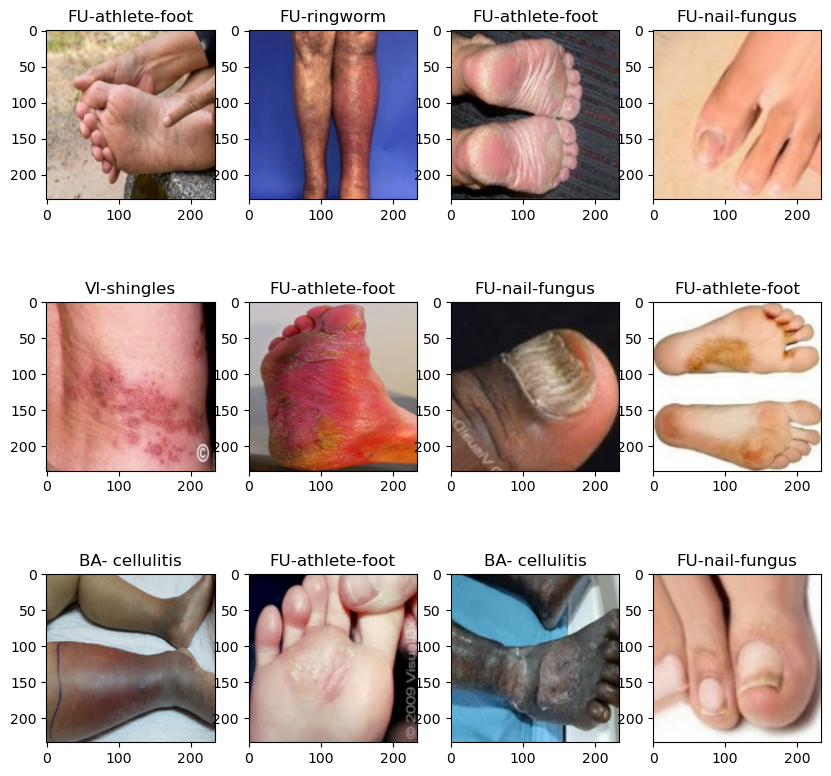

In [140]:

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        
        
        
        # here we are visulize the images of skin disease 
#with axis and with their class names   

(30, 234, 234, 3)
[0 7 4 0 0 7 1 0 0 7 7 5 0 2 6 4 3 0 1 4 3 2 2 0 0 5 4 1 2 2]


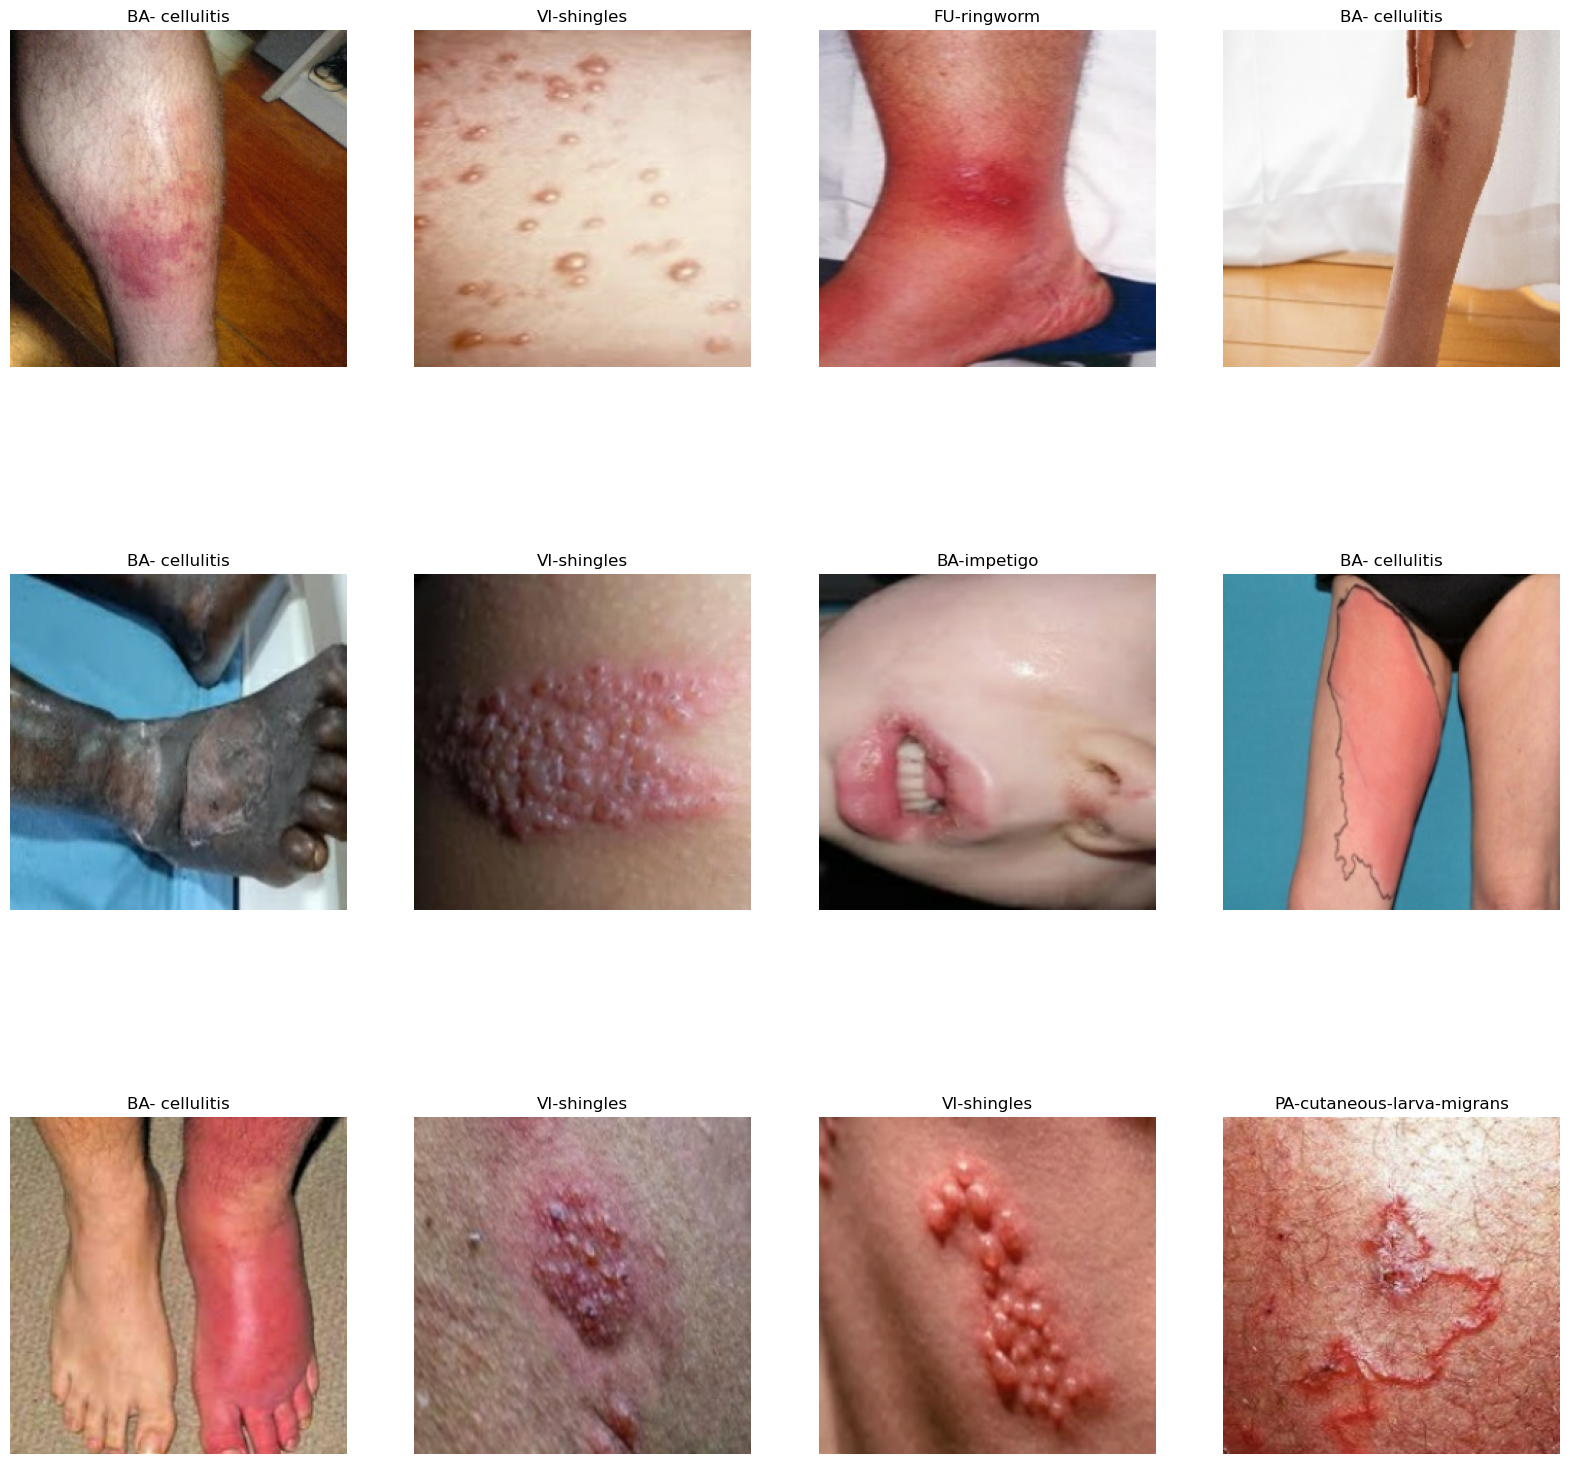

In [141]:

plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels_batch[i]])
        
        
        # here we are visulize the images of skin disease 
#without axis and with their class names 

In [142]:
#              80% ==> training
#               20% ==> testing
               
    
    
#       10% ==> validation
    
#        10% ==> test
        
        #here we are deciding parts of our dataset for trainimng 
        #for testing and validation
        

In [143]:
train_size = 0.8
len(dataset)*train_size


#we are using 80% of data for traing 

35.2

In [144]:
train_ds = dataset.take(35)
len(train_ds)

#we are keeping the train size of 35 for training of dataset


35

In [145]:
test_ds = dataset.skip(35) 
len(test_ds)

##we are keeping the train size of 35 for training of dataset 
#and remaining are skipped and keeping for testing and validation

9

In [146]:
validation_size=0.1
len(dataset)*validation_size

#we are again spliting data in two parts 1 
#is for validation and another is for test

4.4

In [147]:
validation_ds = test_ds.take(4)
len(validation_ds)

#we are keeping this for validation 

4

In [148]:
test_ds = test_ds.skip(4)
len(test_ds)

#we are using this data for testing 

5

In [149]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + validation_split) == 1
    
    #we are insuring the our data is 100% used or not by using assert
    #method
    
    ds_size = len(ds)
    
    #length of dataset
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    #actually splitting the data
    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)
    
    train_ds = ds.take(train_size)    
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)
    
    return train_ds, validation_ds, test_ds

In [150]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [151]:
len(train_ds)

#train dataset is 80% and their length is 35

35

In [152]:
len(validation_ds)

#validation dataset is 10% and their length is 4

4

In [153]:
len(test_ds)

#test dataset is 10% and their length is 5

5

In [154]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


#cache keeping the data in memory so it reduces the time

In [155]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

    
    # images are shown like tha in 3 dimentional array rgb form

[[[ 56.        37.        39.      ]
  [ 80.333336  61.333336  63.333336]
  [109.688034  91.5812    91.794876]
  ...
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]]

 [[ 43.833332  24.833332  26.833332]
  [ 69.91848   50.91848   52.91848 ]
  [100.22907   82.12224   82.33591 ]
  ...
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]]

 [[ 28.7094    12.388887  13.495726]
  [ 57.422256  41.10174   42.20858 ]
  [ 91.958786  74.138214  74.25647 ]
  ...
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]
  [  1.         5.         6.      ]]

 ...

 [[  2.         2.         4.      ]
  [  2.         2.         4.      ]
  [  2.         2.         4.      ]
  ...
  [220.90457  186.89316  188.02283 ]
  [219.98549  184.09233  186.30602 ]
  [218.21368  182.32053  184.53421 ]]

 [[  2.         2.         4.      ]
  [  2.         2.         4.      ]


In [156]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    
    
    # we showing the shape of image batch

(234, 234, 3)


In [157]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/234)
    
    
    # normalising the 3 dimentional array 
    # nromalising the 3 d array by using image size divide the 3 d
    #array for 3d array converting 0 1form

[[[1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  ...
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]]

 [[1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  ...
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]]

 [[1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  ...
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]]

 ...

 [[1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  ...
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]]

 [[1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  [1.0897436 1.0897436 1.0897436]
  ...
  [1.0897436 1.0897436 1.0897436]
  [1

In [158]:
resize_and_rescale = tf.keras.Sequential ([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./234),
]
)


# keras layer :- keras layer we use for normalise and scaling

In [159]:
# data_augmentation = tf.keras.Sequential ([
#   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.2),
# ]
# )

#augmentation code is here

In [160]:
# model

In [161]:
CHANNELS

3

In [162]:
BATCH_SIZE

30

In [163]:
IMAGE_SIZE

234

In [164]:
IMAGE_SIZE

234

In [165]:
EPOCHS

100

In [166]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [167]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (30, 234, 234, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (30, 232, 232, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (30, 116, 116, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (30, 114, 114, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (30, 57, 57, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (30, 55, 55, 64)         

In [168]:
#model compilation

In [169]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [170]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=validation_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/100
35/35 [==============================] - 16s 388ms/step - loss: 2.0635 - accuracy: 0.1789 - val_loss: 2.0631 - val_accuracy: 0.1583
Epoch 2/100
35/35 [==============================] - 13s 384ms/step - loss: 2.0541 - accuracy: 0.2063 - val_loss: 2.0560 - val_accuracy: 0.1583
Epoch 3/100
35/35 [==============================] - 15s 415ms/step - loss: 2.0467 - accuracy: 0.2063 - val_loss: 2.0729 - val_accuracy: 0.1583
Epoch 4/100
35/35 [==============================] - 14s 403ms/step - loss: 2.0504 - accuracy: 0.2063 - val_loss: 2.0580 - val_accuracy: 0.1583
Epoch 5/100
35/35 [==============================] - 14s 399ms/step - loss: 2.0073 - accuracy: 0.2131 - val_loss: 2.0084 - val_accuracy: 0.1917
Epoch 6/100
35/35 [==============================] - 14s 408ms/step - loss: 1.9607 - accuracy: 0.2063 - val_loss: 1.9771 - val_accuracy: 0.1833
Epoch 7/100
35/35 [==============================] - 15s 429ms/step - loss: 1.8997 - accuracy: 0.2366 - val_loss: 1.9309 - val_accuracy:

35/35 [==============================] - 13s 367ms/step - loss: 0.1775 - accuracy: 0.8739 - val_loss: 0.5794 - val_accuracy: 0.8167
Epoch 58/100
35/35 [==============================] - 13s 371ms/step - loss: 0.1777 - accuracy: 0.8798 - val_loss: 0.5621 - val_accuracy: 0.8583
Epoch 59/100
35/35 [==============================] - 13s 372ms/step - loss: 0.1728 - accuracy: 0.8866 - val_loss: 0.5596 - val_accuracy: 0.8583
Epoch 60/100
35/35 [==============================] - 14s 387ms/step - loss: 0.1791 - accuracy: 0.8671 - val_loss: 0.5472 - val_accuracy: 0.8333
Epoch 61/100
35/35 [==============================] - 13s 382ms/step - loss: 0.1726 - accuracy: 0.8856 - val_loss: 0.5775 - val_accuracy: 0.8500
Epoch 62/100
35/35 [==============================] - 13s 376ms/step - loss: 0.1863 - accuracy: 0.8807 - val_loss: 0.5313 - val_accuracy: 0.8500
Epoch 63/100
35/35 [==============================] - 13s 363ms/step - loss: 0.1787 - accuracy: 0.8573 - val_loss: 0.6055 - val_accuracy: 0.850

In [171]:
len(test_ds)

5

In [172]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 1s 89ms/step - loss: 0.5344 - accuracy: 0.8667


In [173]:
scores


[0.534400224685669, 0.8666666746139526]

In [174]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 35}

In [175]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [176]:
history.history['loss']

[2.0635268688201904,
 2.054053544998169,
 2.0467123985290527,
 2.050408363342285,
 2.0072951316833496,
 1.9607353210449219,
 1.8996773958206177,
 1.834996223449707,
 1.7474194765090942,
 1.6422133445739746,
 1.5353882312774658,
 1.4857176542282104,
 1.328637957572937,
 1.2057287693023682,
 1.071076512336731,
 0.9535784721374512,
 0.9108612537384033,
 0.8252665400505066,
 0.7443305253982544,
 0.6377033591270447,
 0.5618845224380493,
 0.4910905957221985,
 0.41317397356033325,
 0.44598639011383057,
 0.4581037163734436,
 0.3598089814186096,
 0.2930665612220764,
 0.29491570591926575,
 0.26171183586120605,
 0.26502877473831177,
 0.26142916083335876,
 0.21090547740459442,
 0.21550731360912323,
 0.21642173826694489,
 0.20975324511528015,
 0.21338537335395813,
 0.1947200447320938,
 0.19012224674224854,
 0.20770466327667236,
 0.19279661774635315,
 0.19864118099212646,
 0.19531938433647156,
 0.18691149353981018,
 0.22474060952663422,
 0.2873987853527069,
 0.5010437965393066,
 0.30017852783203125,

In [177]:
history.history['accuracy']

[0.17888562381267548,
 0.20625610649585724,
 0.20625610649585724,
 0.20625610649585724,
 0.21309873461723328,
 0.20625610649585724,
 0.23655913770198822,
 0.31182795763015747,
 0.32355815172195435,
 0.35777124762535095,
 0.3870967626571655,
 0.42619746923446655,
 0.45650050044059753,
 0.5229716300964355,
 0.567937433719635,
 0.5962854623794556,
 0.6275659799575806,
 0.662756621837616,
 0.6823069453239441,
 0.7292277812957764,
 0.7575757503509521,
 0.774193525314331,
 0.8054741024971008,
 0.7976539731025696,
 0.798631489276886,
 0.8211143612861633,
 0.8699902296066284,
 0.8563050031661987,
 0.8572825193405151,
 0.8660801649093628,
 0.8631476163864136,
 0.8866080045700073,
 0.8680351972579956,
 0.8817204236984253,
 0.8807429075241089,
 0.8895405530929565,
 0.8768328428268433,
 0.8719452619552612,
 0.8768328428268433,
 0.8758553266525269,
 0.8817204236984253,
 0.8797653913497925,
 0.8758553266525269,
 0.8651026487350464,
 0.8465298414230347,
 0.7927663922309875,
 0.8426197171211243,
 0.85

In [178]:
history.history['val_loss']

[2.0630552768707275,
 2.0560336112976074,
 2.0729405879974365,
 2.0580427646636963,
 2.0083746910095215,
 1.9771113395690918,
 1.9309039115905762,
 1.9238532781600952,
 1.934059977531433,
 1.6214821338653564,
 1.56051504611969,
 1.4098563194274902,
 1.3175259828567505,
 1.0905883312225342,
 0.9827054142951965,
 0.9641308188438416,
 1.0890765190124512,
 0.9029306769371033,
 1.0503774881362915,
 0.7527031302452087,
 0.8780184984207153,
 0.6556654572486877,
 0.7608850598335266,
 0.7529733180999756,
 0.5805150270462036,
 0.5629929900169373,
 0.5624018311500549,
 0.5840618014335632,
 0.5950344204902649,
 0.6070886254310608,
 0.5734691023826599,
 0.579278290271759,
 0.5987889766693115,
 0.5655743479728699,
 0.7667328715324402,
 0.5367153286933899,
 0.5967741012573242,
 0.6278483867645264,
 0.5792175531387329,
 0.5997820496559143,
 0.5702123641967773,
 0.5895914435386658,
 0.6463040709495544,
 0.6021047830581665,
 0.6510041356086731,
 0.6360280513763428,
 0.5528705716133118,
 0.73887228965759

In [179]:
history.history['val_accuracy']

[0.15833333134651184,
 0.15833333134651184,
 0.15833333134651184,
 0.15833333134651184,
 0.19166666269302368,
 0.18333333730697632,
 0.15833333134651184,
 0.30000001192092896,
 0.25,
 0.38333332538604736,
 0.32499998807907104,
 0.4166666567325592,
 0.5333333611488342,
 0.550000011920929,
 0.6083333492279053,
 0.5916666388511658,
 0.5333333611488342,
 0.6333333253860474,
 0.574999988079071,
 0.6833333373069763,
 0.7166666388511658,
 0.7833333611488342,
 0.7916666865348816,
 0.75,
 0.7916666865348816,
 0.8333333134651184,
 0.824999988079071,
 0.800000011920929,
 0.8833333253860474,
 0.8416666388511658,
 0.8166666626930237,
 0.8666666746139526,
 0.8666666746139526,
 0.8500000238418579,
 0.8083333373069763,
 0.8666666746139526,
 0.8666666746139526,
 0.8333333134651184,
 0.8416666388511658,
 0.8666666746139526,
 0.8666666746139526,
 0.8416666388511658,
 0.8166666626930237,
 0.8666666746139526,
 0.8083333373069763,
 0.800000011920929,
 0.824999988079071,
 0.7666666507720947,
 0.8583333492279

In [180]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

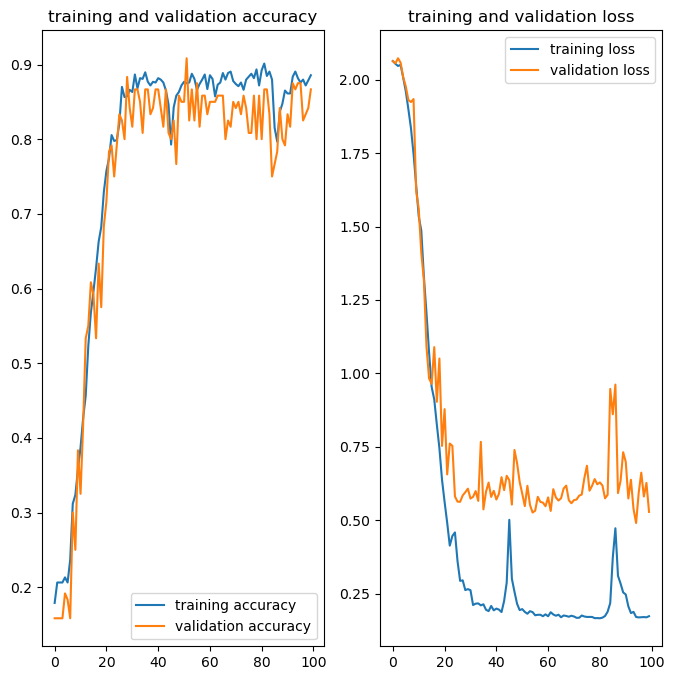

In [181]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='training loss')
plt.plot(range(EPOCHS),val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

first image to predict
actual label: FU-nail-fungus
1/1 [==============================] - 0s 257ms/step
predicted label: FU-nail-fungus


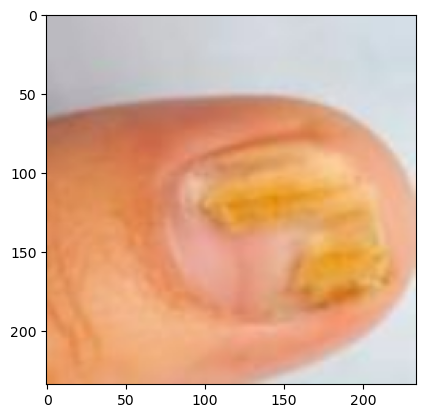

In [182]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    

In [183]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)   #create a image array
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


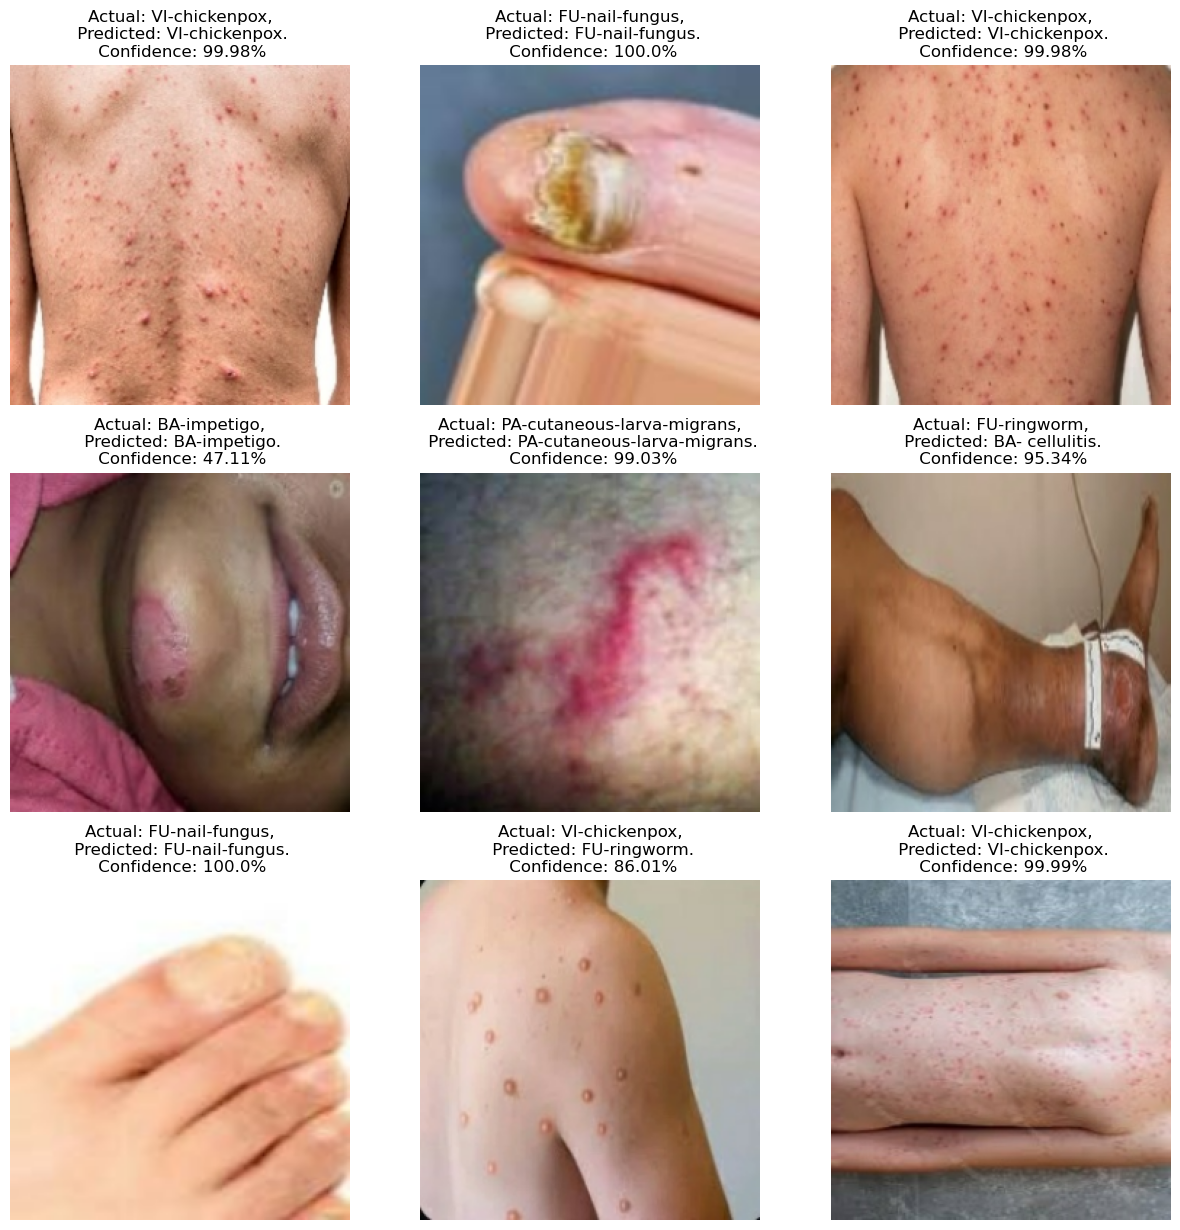

In [184]:
import numpy as np 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 35ms/step


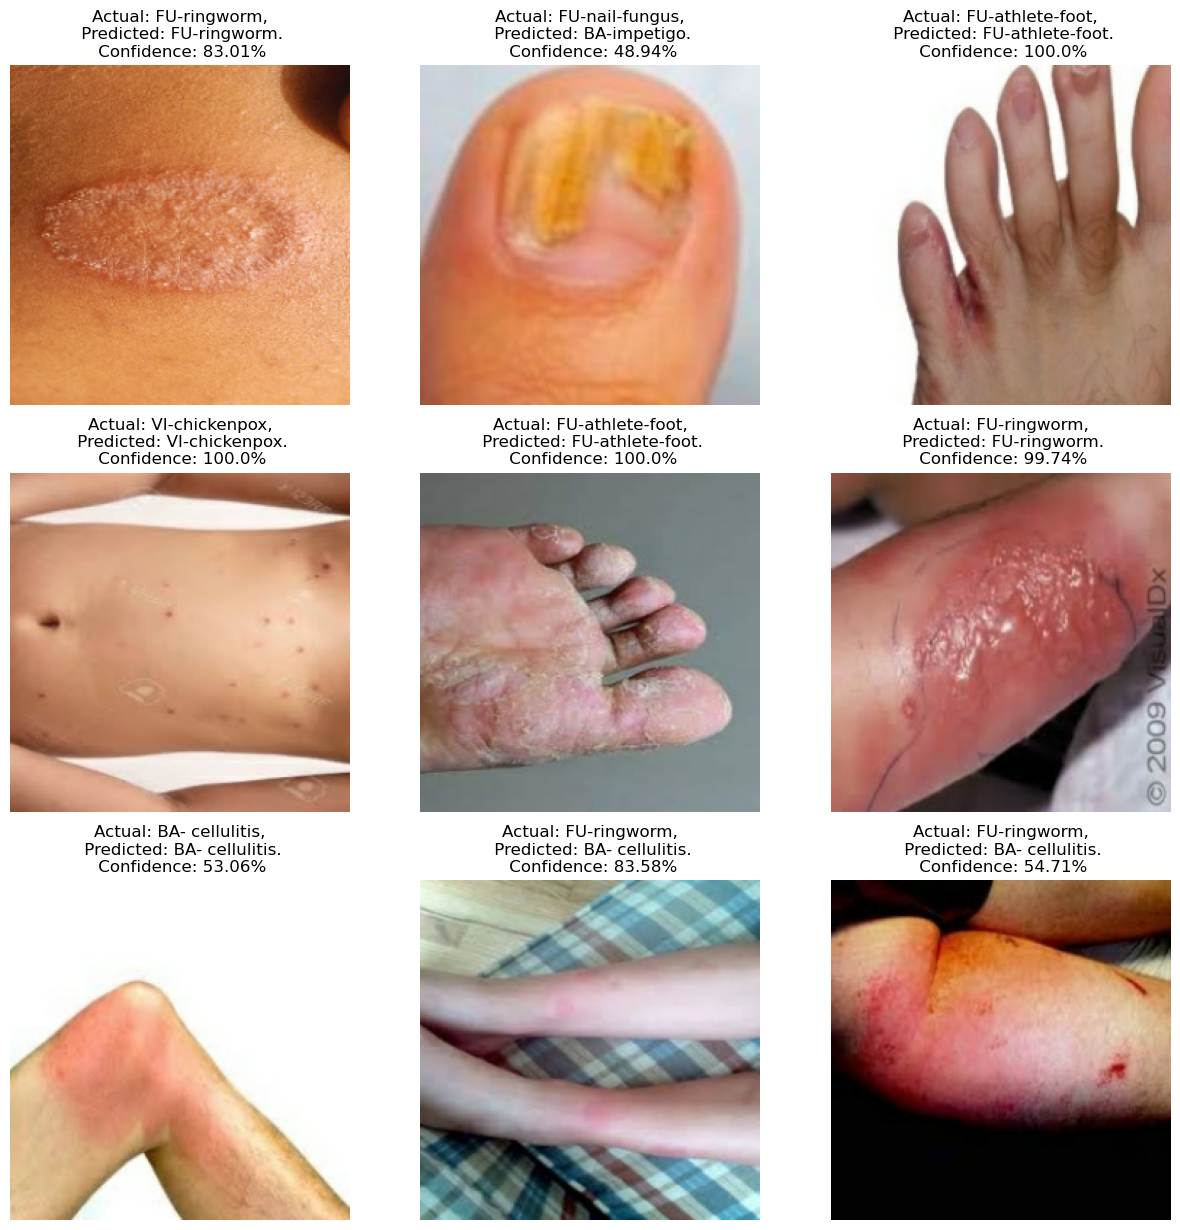

In [185]:
import numpy as np 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [186]:
# os.listdir("../model")

In [187]:
# import os 
# model_version = max([int(i) for i in (os.listdir("../model")+[0])]) + 1
# # model.save(f"../model/{model_version}")

In [188]:
import os
from keras.models import load_model

directory_path = "../models3"

# Check if the directory exists, if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Get existing model versions
existing_models = [filename for filename in os.listdir(directory_path) if filename.startswith("model_")]

# Extract version numbers
model_versions = [int(filename.split("_")[1].split(".")[0]) for filename in existing_models]

# Determine the next model version
if model_versions:
    model_version = max(model_versions) + 1
else:
    model_version = 1

# Save the model
model.save(os.path.join(directory_path, f"model_{model_version}.h5"))

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [189]:
model.save("../skin.h5")

In [190]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predictions, average=None)
recall = recall_score(true_labels, predictions, average=None)
f1 = f1_score(true_labels, predictions, average=None)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Display the results
print(results_df)

1/1 [==============================] - 0s 204ms/step
                        Class  Precision    Recall  F1-Score
0              BA- cellulitis   0.566667  0.772727  0.653846
1                 BA-impetigo   0.777778  0.700000  0.736842
2             FU-athlete-foot   0.933333  1.000000  0.965517
3              FU-nail-fungus   0.888889  0.842105  0.864865
4                 FU-ringworm   0.695652  0.571429  0.627451
5  PA-cutaneous-larva-migrans   1.000000  0.928571  0.962963
6               VI-chickenpox   1.000000  0.960000  0.979592
7                 VI-shingles   1.000000  1.000000  1.000000


In [191]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Display the accuracy
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 146ms/step
Accuracy: 0.8333333333333334


1/1 [==============================] - 0s 176ms/step


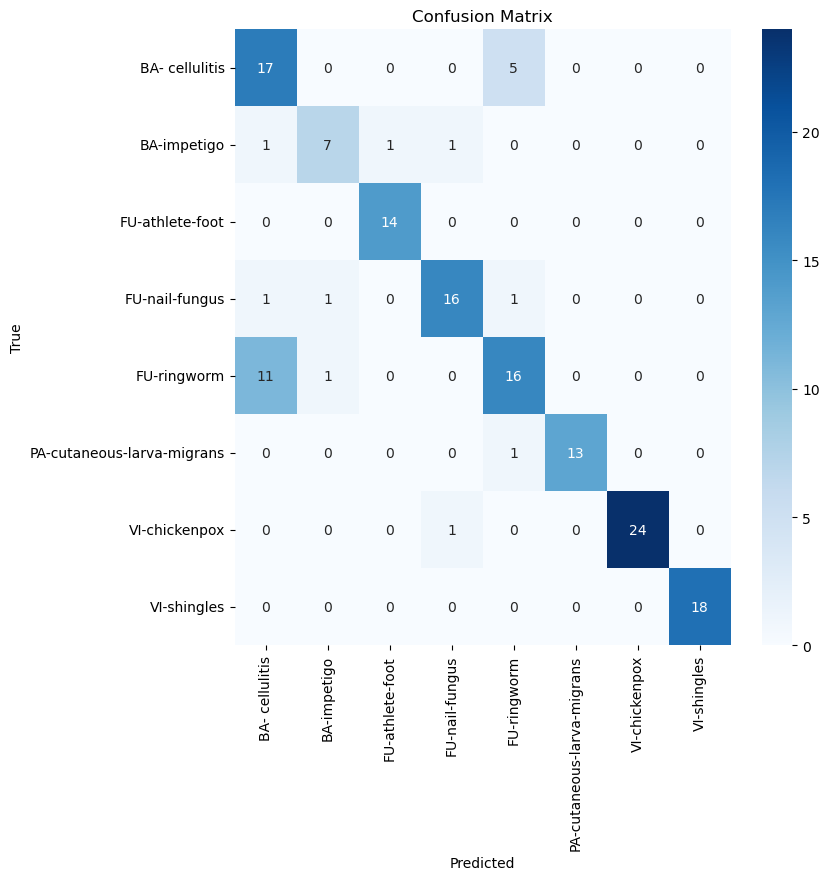

In [192]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to plot a confusion matrix
def plot_confusion_matrix(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predictions, class_names)


In [193]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Generate a classification report

class_names = ['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']
report = classification_report(true_labels, predictions, target_names=class_names)

# Display class-wise accuracy
print(report)


1/1 [==============================] - 0s 179ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.57      0.77      0.65        22
               BA-impetigo       0.78      0.70      0.74        10
           FU-athlete-foot       0.93      1.00      0.97        14
            FU-nail-fungus       0.89      0.84      0.86        19
               FU-ringworm       0.70      0.57      0.63        28
PA-cutaneous-larva-migrans       1.00      0.93      0.96        14
             VI-chickenpox       1.00      0.96      0.98        25
               VI-shingles       1.00      1.00      1.00        18

                  accuracy                           0.83       150
                 macro avg       0.86      0.85      0.85       150
              weighted avg       0.84      0.83      0.83       150



In [194]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix, recall_score
import numpy as np

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate precision, recall, F1 score, specificity, and confusion matrix
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
conf_matrix = confusion_matrix(true_labels, predictions)

# Calculate specificity
TN = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FP = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TN = TN.astype(float)
FP = FP.astype(float)

specificity = np.nan_to_num(TN / (TN + FP), nan=0.0)

# Calculate average specificity
average_specificity = np.mean(specificity)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Average Specificity: {average_specificity:.2f}')


1/1 [==============================] - 0s 137ms/step
Precision: 0.84
Recall: 0.83
F1 Score: 0.83
Confusion Matrix:
[[17  0  0  0  5  0  0  0]
 [ 1  7  1  1  0  0  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 1  1  0 16  1  0  0  0]
 [11  1  0  0 16  0  0  0]
 [ 0  0  0  0  1 13  0  0]
 [ 0  0  0  1  0  0 24  0]
 [ 0  0  0  0  0  0  0 18]]
Average Specificity: 0.36


C:\Users\anike\AppData\Local\Temp\ipykernel_20568\1953704601.py:38: RuntimeWarning: invalid value encountered in divide
  specificity = np.nan_to_num(TN / (TN + FP), nan=0.0)
